## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

2025-05-13 17:55:08,329 - INFO - Successfully generated 122 data points with anomalies.


2025-05-13 17:55:08,893 - INFO - Anomaly detection completed using Isolation Forest.


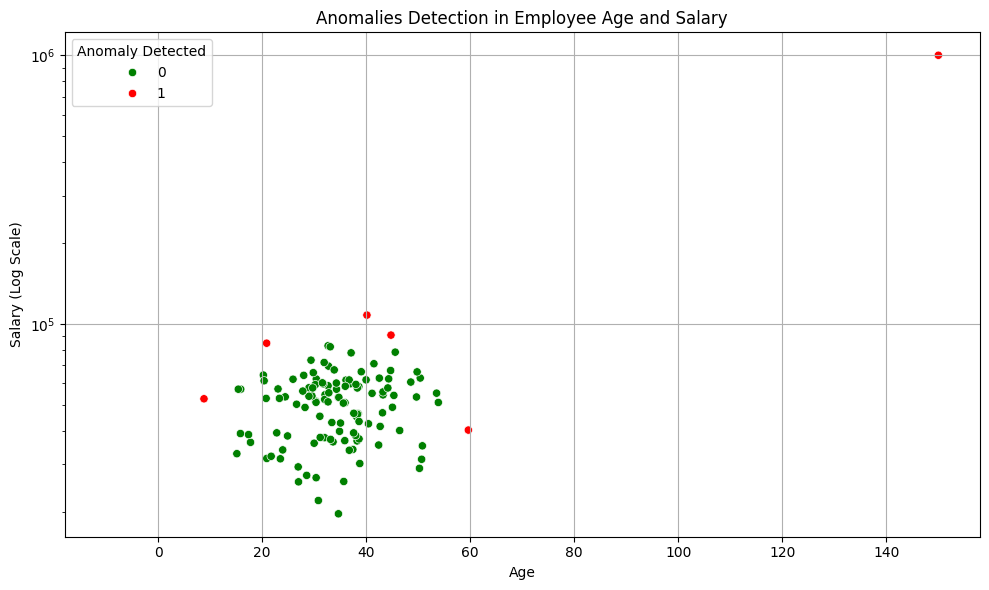

2025-05-13 17:55:09,608 - INFO - Anomaly plot displayed.
2025-05-13 17:55:09,613 - INFO - Results successfully saved to employee_anomalies_20250513_175509.csv.


In [4]:
import pandas as pd
import numpy as np
import logging
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up logging for better traceability
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Generate synthetic dataset with custom anomalies
def generate_synthetic_data(sample_size=120):
    """Generates a more complex synthetic dataset with anomalies"""
    try:
        np.random.seed(42)
        # Simulate a realistic distribution of ages and salaries
        ages = np.random.normal(35, 10, sample_size).tolist() + [150, -10]  # Adding anomalies
        salaries = np.random.normal(50000, 15000, sample_size).tolist() + [1000000, -20000]  # Adding anomalies
        df = pd.DataFrame({'age': ages, 'salary': salaries})
        
        # Check for missing or invalid data (e.g., NaN values or non-numeric data)
        if df.isnull().any().any():
            raise ValueError("Data contains NaN values.")
        
        logging.info(f"Successfully generated {len(df)} data points with anomalies.")
        return df
    except Exception as e:
        logging.error(f"Error during data generation: {e}")
        raise

# Apply Isolation Forest to detect anomalies
def detect_anomalies(df):
    """Detect anomalies in the dataset using IsolationForest"""
    try:
        # Ensure model is fitted with the data first
        model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
        
        # Fit the model with the data
        model.fit(df[['age', 'salary']])
        
        # Predict the anomalies and calculate anomaly scores
        df['anomaly_score'] = model.decision_function(df[['age', 'salary']])
        df['is_anomaly'] = model.predict(df[['age', 'salary']])
        
        # Convert -1 (anomaly) to 1 and 1 (normal) to 0
        df['is_anomaly'] = df['is_anomaly'].map({1: 0, -1: 1})
        
        logging.info("Anomaly detection completed using Isolation Forest.")
        return df
    except Exception as e:
        logging.error(f"Error during anomaly detection: {e}")
        raise

# Function to visualize detected anomalies
def visualize_anomalies(df):
    """Visualize anomalies using scatter plot"""
    try:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            x='age',
            y='salary',
            hue='is_anomaly',
            palette={0: 'green', 1: 'red'},
            data=df
        )
        plt.yscale('log')  # Log scale to handle large salary anomalies
        plt.title("Anomalies Detection in Employee Age and Salary")
        plt.xlabel("Age")
        plt.ylabel("Salary (Log Scale)")
        plt.legend(title="Anomaly Detected")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        logging.info("Anomaly plot displayed.")
    except Exception as e:
        logging.error(f"Error during plotting anomalies: {e}")
        raise

# Save results to a timestamped CSV file
def save_results(df):
    """Save the detected anomalies to a CSV file with timestamp"""
    try:
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        file_name = f"employee_anomalies_{timestamp}.csv"
        df.to_csv(file_name, index=False)
        logging.info(f"Results successfully saved to {file_name}.")
    except Exception as e:
        logging.error(f"Error saving results: {e}")
        raise

# Main pipeline for anomaly detection
def anomaly_detection_pipeline():
    """End-to-end pipeline for anomaly detection and visualization"""
    try:
        # Step 1: Generate synthetic dataset
        df = generate_synthetic_data()

        # Step 2: Detect anomalies using Isolation Forest
        df = detect_anomalies(df)

        # Step 3: Visualize the anomalies detected
        visualize_anomalies(df)

        # Step 4: Save results to CSV
        save_results(df)
    except Exception as e:
        logging.error(f"Pipeline failed: {e}")
        raise

# Run the pipeline
if __name__ == "__main__":
    anomaly_detection_pipeline()


**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [5]:
# write your code from here

**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

In [6]:
# write your code from here
